In [1]:
# check can load in ospex output from sswidl from fit_mfstats9_a0_org_saveout.pro
# 
# 13-Mar-2024 IGH

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sunpy.io.special import read_genx

import warnings
warnings.simplefilter('ignore')

matplotlib.rcParams['font.size']=14

In [3]:
res=read_genx('res/fitout_20030725_082634.genx')

In [4]:
ftims=res["SAVEGEN0"]["FTIMS"]
engs=res["SAVEGEN0"]["ENGS"]
mide=res["SAVEGEN0"]["MIDE"]
data_flux=res["SAVEGEN0"]["DATA_FLUX"]
edata_flux=res["SAVEGEN0"]["EDATA_FLUX"]
back_flux=res["SAVEGEN0"]["BACK_FLUX"]
eback_flux=res["SAVEGEN0"]["EBACK_FLUX"]
modtot=res["SAVEGEN0"]["MODTOT"]
modth=res["SAVEGEN0"]["MODTH"]
modnn=res["SAVEGEN0"]["MODNN"]
fit_range=res["SAVEGEN0"]["FIT_RANGE"]
chisq=res["SAVEGEN0"]["CHISQ"]
osx_p=res["SAVEGEN0"]["OSX_P"]

de=engs[0,1]-engs[0,0]

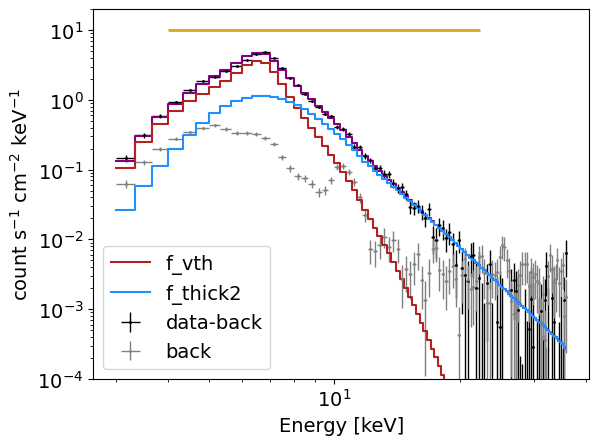

In [5]:
plt.errorbar(mide,data_flux,xerr=0.5*de*np.ones(len(mide)),yerr=edata_flux,\
             fmt='.',color='k',lw=1.,ms=2,label='data-back')
plt.errorbar(mide,back_flux,xerr=0.5*de*np.ones(len(mide)),yerr=eback_flux,\
             fmt='.',color='grey',lw=1.,ms=2,label='back')
plt.step(engs[:,0],modtot,color='purple',where='post')
plt.step(engs[:,0],modth,color='firebrick',where='post',label='f_vth')
plt.step(engs[:,0],modnn,color='dodgerblue',where='post',label='f_thick2')
plt.hlines(1e1,fit_range[0],fit_range[1],color='goldenrod',lw=2)
plt.ylim([1e-4,2e1])
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Energy [keV]")
plt.ylabel("count s$^{-1}$ cm$^{-2}$ keV$^{-1}$")
plt.legend(loc=3)
plt.show()